## Diabetes disease prediction using ML


- Dataset is taken from kaggle and the model used for building this predictive system is random forest classifier.
- The model is developed and deployed using streamlit.
- Important libraries other than the general libraries used are pickle,streamlit, streamlit_option_menu.
- The pickle library is used to save an load the model developed.
- The streamlit library is used to deploy the machine learning model.
- The streamlit_option_menu is used to develop the navgaion menu in the site created using streamlit.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix



import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"D:\EXTRA PROJECT\Diabetes and Heart diseases model development daataset\diabetes.csv")

In [3]:
df.shape

(768, 9)

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:

def numerical_inspection(data):
   
    numerical_summary = data.describe().transpose()
    numerical_summary['Feature'] = numerical_summary.index
    numerical_summary = numerical_summary[['Feature', 'mean', 'std']]
    numerical_summary.rename(columns={'mean': 'Mean', 'std': 'StdDev'}, inplace=True)
    return numerical_summary



In [10]:
numerical_inspection(df)

,Feature,Mean,StdDev
Pregnancies,Pregnancies,3.845052,3.369578
Glucose,Glucose,120.894531,31.972618
BloodPressure,BloodPressure,69.105469,19.355807
SkinThickness,SkinThickness,20.536458,15.952218
Insulin,Insulin,79.799479,115.244002
BMI,BMI,31.992578,7.884160
DiabetesPedigreeFunction,DiabetesPedigreeFunction,0.471876,0.331329
Age,Age,33.240885,11.760232
Outcome,Outcome,0.348958,0.476951


In [11]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

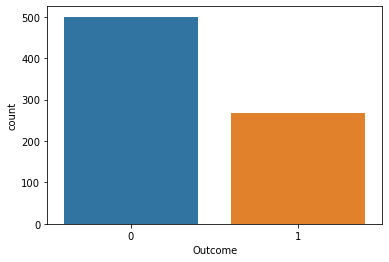

In [12]:
sns.countplot(df['Outcome'])

* The 'Outcome' column in the dataset has 2 classes,'0' indicating no diabetes, '1' indicating there is diabetes
* The target flag is '1' which indicate that there is diabetes.
* The '1' count is 268 which is 34.89% of the whole data

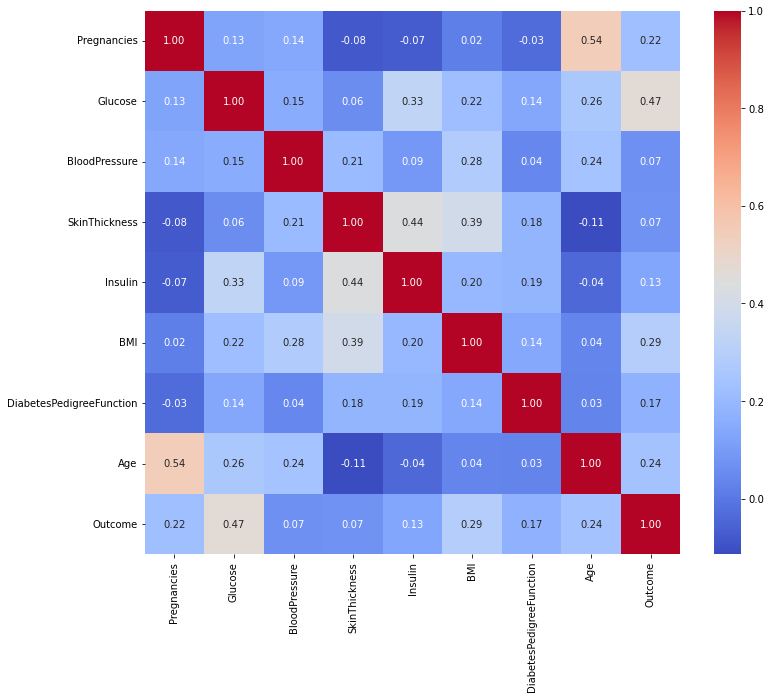

In [13]:
plt.figure(figsize=(12, 10))  # Adjust the size 

# Plot the heatmap with correlation values and annotations
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

In [14]:
# checking the correlation using the correation table
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Positive Correlations:

* "Pregnancies" has a positive correlation with "Age" (0.544341) and a moderately positive correlation with "Glucose" (0.129459) and "BMI" (0.017683). This suggests that as the number of pregnancies increases, there is a tendency for the age, glucose levels, and BMI to increase as well.
* "Glucose" has a moderate positive correlation with "Insulin" (0.331357), "BMI" (0.221071), and "Age" (0.263514). This    indicates that higher glucose levels are associated with higher insulin levels, higher BMI, and older age.
* "BMI" has a moderate positive correlation with "SkinThickness" (0.392573) and "Insulin" (0.197859), suggesting that higher BMI values are associated with thicker skin and higher insulin levels.

Negative Correlations:

* "Pregnancies" has a negative correlation with "SkinThickness" (-0.081672) and "Insulin" (-0.073535). This implies that as the number of pregnancies increases, there is a slight tendency for skin thickness and insulin levels to decrease, although the correlations are relatively weak.
*"SkinThickness" has a negative correlation with "Age" (-0.113970), indicating that skin thickness tends to be lower in older individuals.

Correlation with "Outcome":

* Among all the features, "Glucose" has the highest positive correlation with the "Outcome" (0.466581). This indicates that higher glucose levels are positively associated with the likelihood of diabetes ("Outcome").
* "BMI" also shows a moderate positive correlation with "Outcome" (0.292695), suggesting that higher BMI values are associated with an increased risk of diabetes.
* "Age" also has a moderate positive correlation with "Outcome" (0.238356), implying that older age might be linked to a higher likelihood of diabetes.

<AxesSubplot:title={'center':'comparison between BMI and BloodPressure'}, xlabel='BMI', ylabel='BloodPressure'>

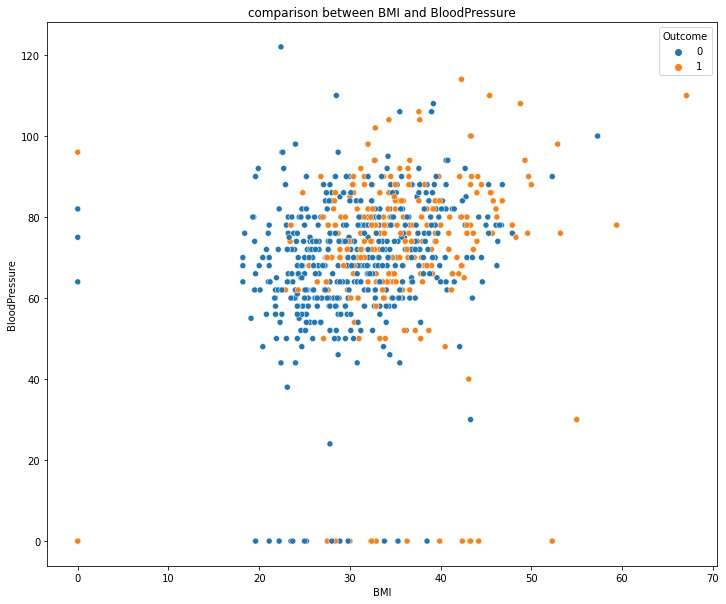

In [15]:
plt.figure(figsize=(12,10))
plt.title("comparison between BMI and BloodPressure")
sns.scatterplot(df['BMI'],df['BloodPressure'],hue=df['Outcome'])

- From the scatter plot we can see that the people with 'BMI' in the range of 25 to 100, and 'BloodPressure' in the range of 45 to 100 has chances of diabetes very high 


In [16]:
X=df.drop("Outcome",axis=1)
y=df['Outcome']

In [17]:
#model training and testing (80-for training and 20-for testing )
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)

In [18]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [19]:
rf=RandomForestClassifier(n_estimators=100,random_state=40,max_depth=8,class_weight='balanced')
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, random_state=40)

In [20]:
y_pred=rf.predict(X_test)

In [21]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

In [22]:
print('Accuracy:',accuracy*100)
print('Precision:',precision*100)
print('Recall:',recall*100)
print('F1-Score:',f1score*100)

Accuracy: 75.97402597402598
Precision: 72.91666666666666
Recall: 59.32203389830508
F1-Score: 65.42056074766354


### Making prediction system 

In [23]:
input_data = (1,126,60,0,0,30.1,0.349,47)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


### Saving the pickle file

In [24]:
import pickle 

In [25]:
filename = 'diabetes_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [26]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [28]:
input_data = (1,126,60,0,0,30.1,0.349,47)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic
